<a href="https://colab.research.google.com/github/kartoone/cosc470/blob/main/examples/detr-part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://huggingface.co/docs/transformers/main/en/model_doc/detr
# also look into MaskDINO

import io
import requests
from PIL import Image
import torch
import numpy

from transformers import AutoImageProcessor, DetrForSegmentation
from transformers.image_transforms import rgb_to_id

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50-panoptic")
model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

# forward pass
outputs = model(**inputs)

# Use the `post_process_panoptic_segmentation` method of the `image_processor` to retrieve post-processed panoptic segmentation maps
# Segmentation results are returned as a list of dictionaries
result = image_processor.post_process_panoptic_segmentation(outputs, target_sizes=[(300, 500)])

# A tensor of shape (height, width) where each value denotes a segment id, filled with -1 if no segment is found
panoptic_seg = result[0]["segmentation"]
# Get prediction score and segment_id to class_id mapping of each segment
panoptic_segments_info = result[0]["segments_info"]



[{'id': 1, 'label_id': 17, 'was_fused': False, 'score': 0.994097}, {'id': 2, 'label_id': 75, 'was_fused': False, 'score': 0.998669}, {'id': 3, 'label_id': 75, 'was_fused': False, 'score': 0.999476}, {'id': 4, 'label_id': 63, 'was_fused': False, 'score': 0.972207}, {'id': 5, 'label_id': 17, 'was_fused': False, 'score': 0.999423}]


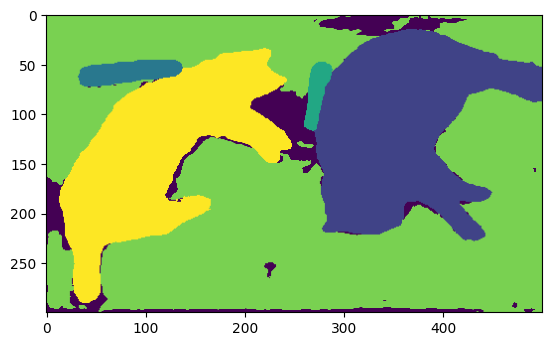

In [ ]:
print(panoptic_segments_info)
import matplotlib.pyplot as plt
plt.imshow(panoptic_seg)
